# QAOA Max-Cut Exercise: 2-Node Graph

## Introduction and Problem Description

### What is Max-Cut?

The Max-Cut problem is a classic problem in combinatorial optimization where you want to split the nodes of a graph into two groups to maximize the number of edges connecting nodes from different groups.

For example, consider a simple graph with 2 nodes connected by a single edge. The best cut here is to place each node in a different group, cutting that single edge.

---

### What is QAOA?

QAOA stands for **Quantum Approximate Optimization Algorithm**. It is a hybrid quantum-classical algorithm designed to find approximate solutions to optimization problems like Max-Cut.

- QAOA prepares a quantum state that represents a superposition of all possible solutions.
- It applies operators based on the problem structure (cost unitary) and mixing operators to explore solution space.
- After measurement, the outcome with the highest probability corresponds to a good approximate solution.

---

### How does this circuit work?

1. **Initialization (Hadamard gates):**  
   Each qubit is put into a superposition state, representing all possible ways to assign nodes to groups simultaneously.

2. **Cost Unitary (RZZ gate):**  
   This encodes the problem’s cost function (how good a cut is) by applying phases to the quantum states based on the edges in the graph.

3. **Mixing Unitary (RX rotations):**  
   These rotations allow the algorithm to explore different cuts by mixing the amplitudes of the quantum states.

4. **Measurement:**  
   Measuring the qubits collapses the quantum state to a classical bitstring, representing one possible cut.

---

### Parameters $\gamma$ and $\beta$

- The angles $\gamma$ and $\beta$ control the strength of the cost and mixing operations.
- Optimizing these angles is key to improving the quality of solutions, but in this exercise, we will use fixed values for simplicity.
- QAOA is sensitive to these parameters and usually requires optimization (classical outer loop) to find the best angles. Since this example uses fixed angles, perfect separation isn’t guaranteed.

---

### What do the results mean?

The output is a histogram showing how many times each possible solution was measured.  
- Bitstrings where the two bits differ (e.g., "01" or "10") represent the maximum cut (nodes in different groups).
- You should see these bitstrings appear more often than others, indicating the algorithm favors the best solutions.



# Exercise problem

You want to solve the Max-Cut problem on a simple graph with 2 nodes connected by 1 edge using QAOA with 1 layer (p=1).

The Max-Cut problem aims to divide the nodes into two groups to maximize the number of edges between groups. For 2 nodes connected by an edge, the best cut separates the two nodes.

---

## Step 1: Setup and Initialization

- Create a 2-qubit quantum circuit with 2 classical bits for measurement.
- Apply Hadamard gates to create superposition on both qubits.

---

## Step 2: Apply the Cost Unitary

- Apply the cost operator using the RZZ gate with parameter $2 \gamma$ to encode the edge.

---

## Step 3: Apply the Mixing Unitary

- Apply RX rotations with angle $2 \beta$ to each qubit.

---

## Step 4: Measurement and Simulation

- Measure both qubits.
- Simulate the circuit and plot the measurement histogram.

---

## Given parameters:

$
\gamma = \frac{\pi}{4}, \quad \beta = \frac{\pi}{8}
$

---

## Your tasks:  
- Complete steps 2–4 by filling in the missing code.
- Given the current parameter choices, the quantum circuit is expected to assign higher probabilities to the Max-Cut solutions "01" and "10", which represent the nodes being placed on opposite sides of the cut (i.e., separated). Try playing around with the parameters to see how the results can change.


In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RZZGate
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Setup and Initialization
qc = QuantumCircuit(2, 2)
qc.h([0, 1])  # Apply Hadamards

# Parameters
gamma = -np.pi / 4
beta = np.pi / 8

# Step 2: Apply the Cost Unitary
# TODO: Apply RZZ gate with angle 2*gamma on qubits 0 and 1
# YOUR CODE HERE

# Step 3: Apply the Mixing Unitary
# TODO: Apply RX rotations with angle 2*beta on both qubits
# YOUR CODE HERE

# Step 4: Measurement and Simulation
# TODO: Measure both qubits
# YOUR CODE HERE

backend = Aer.get_backend('aer_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

print("QAOA Max-Cut results:")
print(counts)
plot_histogram(counts)

QiskitError: 'No counts for experiment "0"'

QAOA Max-Cut results:
{'10': 517, '01': 507}


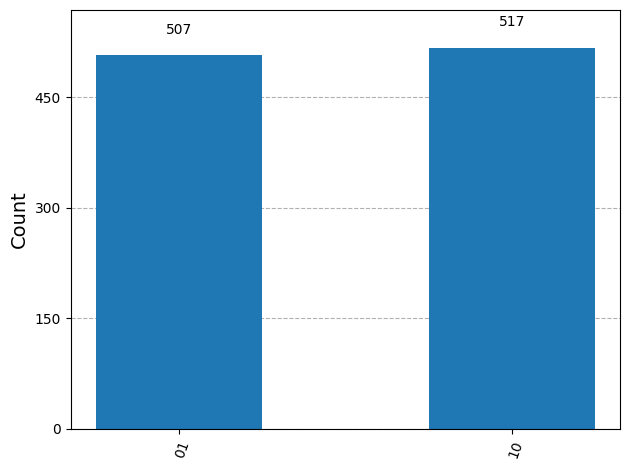

In [2]:
# SOLUTION
from qiskit import QuantumCircuit
from qiskit.circuit.library import RZZGate
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Setup and Initialization
qc = QuantumCircuit(2, 2)
qc.h([0, 1])  # Apply Hadamards

# Parameters
gamma = -np.pi / 4
beta = np.pi / 8

# Step 2: Apply the Cost Unitary
# YOUR CODE HERE
# Solution:
qc.append(RZZGate(2 * gamma), [0, 1])

# Step 3: Apply the Mixing Unitary
# YOUR CODE HERE
# Solution:
qc.rx(2 * beta, 0)
qc.rx(2 * beta, 1)

# Step 4: Measurement and Simulation
# YOUR CODE HERE
# Solution:
qc.measure([0, 1], [0, 1])

backend = Aer.get_backend('aer_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

print("QAOA Max-Cut results:")
print(counts)
plot_histogram(counts)